In [21]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from ipywidgets import interact, FloatLogSlider

# Generate data
np.random.seed(42)
n_samples = 200
X = np.zeros((n_samples, 6))
X[:, 0] = np.random.normal(0, 1, n_samples)  # X1 - Important feature
X[:, 1] = np.random.normal(0, 1, n_samples)  # X2 -  Important feature
X[:, 2] = X[:, 0] + np.random.normal(0, 0.1, n_samples)  # Correlated with X1
X[:, 3] = X[:, 1] + np.random.normal(0, 0.1, n_samples)  # Correlated with X2
X[:, 4] = np.random.normal(0, 0.1, n_samples)  # Noise
X[:, 5] = np.random.normal(0, 0.1, n_samples)  # Noise

y = 3 * X[:, 0] + 2 * X[:, 1] + 0.5 * X[:, 2] + np.random.normal(0, 0.1, n_samples) 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print('Ridge Regression RMSE:', ridge_rmse)
print('Ridge Regression R\u00b2>:', ridge_r2)

Ridge Regression RMSE: 0.14410020171824975
Ridge Regression R²>: 0.9984722762470865


In [37]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print('Lasso Regression RMSE:', lasso_rmse)
print('Lasso Regression R\u00b2>:', lasso_r2)

Lasso Regression RMSE: 1.2984978990079017
Lasso Regression R²>: 0.8759496036905758


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

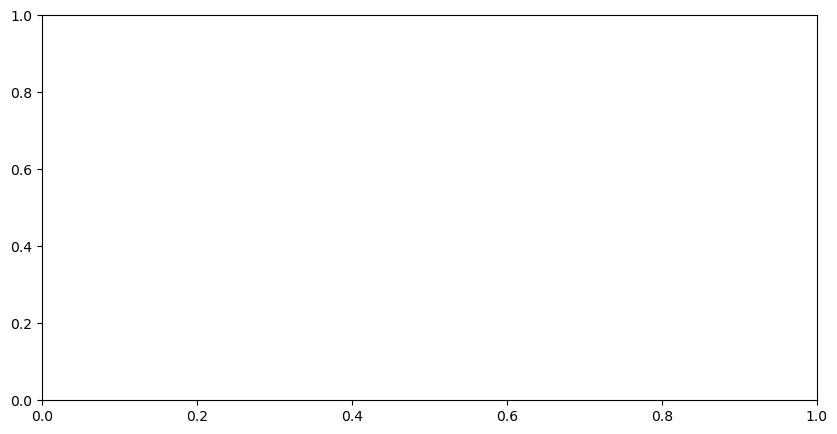

In [39]:
plt.figure(figsize = (10,5))
plt.plot(alphas, lasso_rmse, label = 'Lasso MSE')
plt.plot(alphas, ridge_rmse, label = 'Ridge MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Alpha for Lasso and Ridge Regression')
plt.legend()
plt.show()

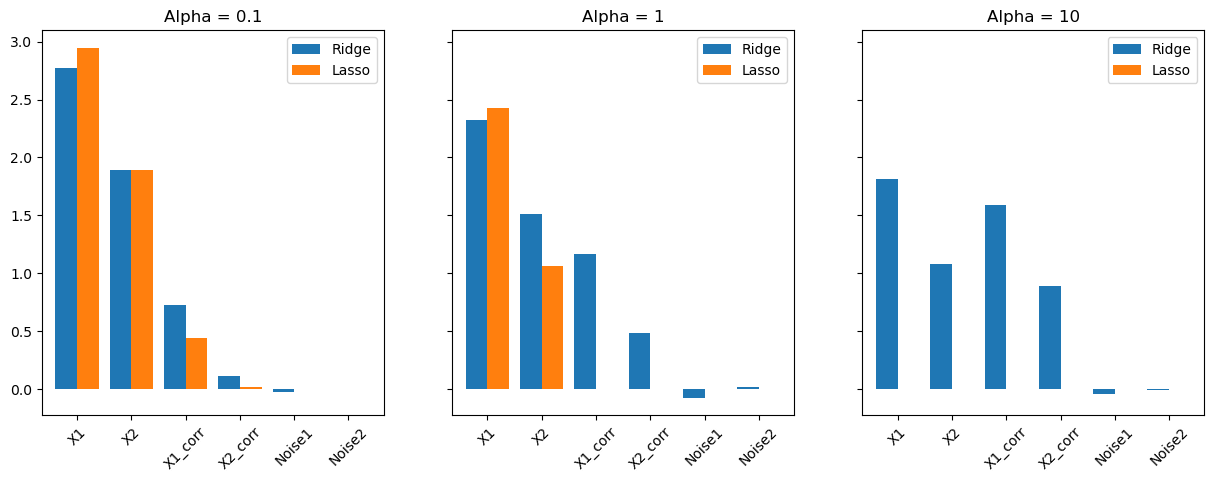

In [35]:
alphas = [0.1, 1, 10]
data = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha).fit(X, y)
    lasso = Lasso(alpha = alpha).fit(X, y)
    data.append(pd.DataFrame({
        'Ridge': ridge.coef_,
        'Lasso': lasso.coef_
    }, index = ['X1', 'X2', 'X1_corr', 'X2_corr', 'Noise1', 'Noise2']))
    
fig, ax = plt.subplots(1,3, figsize = (15,5), sharey = True)

for i, df in enumerate(data): # i tracks current plot location, df is one dataframe in data
    df.plot.bar(ax = ax[i], width = 0.8)
    ax[i].set_title(f'Alpha = {alphas[i]}')
    ax[i].set_xticklabels((df.index), rotation = 45)
    
plt.show()